/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[254]
   [252]
   [252]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/1200
411/411 [==============================] - 0s 177us/sample - loss: 1.8513 - acc: 0.2774
Epoch 2/1200
411/411 [==============================] - 0s 35us/sample - loss: 1.6013 - acc: 0.3406
Epoch 3/1200
411/411 [==============================] - 0s 35us/sample - loss: 1.5406 - acc: 0.3552
Epoch 4/1200
411/411 [==============================] - 0s 37us/sample - loss: 1.4470 - acc: 0.4501
Epoch 5/1200
411/411 [==============================] - 0s 35us/sample - loss: 1.4231 - acc: 0.

100%|██████████| 9/9 [00:00<00:00, 902.28it/s]

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]
44/44 [==============================] - 0s 408us/sample - loss: 0.4304 - acc: 0.8636
test accuracy: 0.8636364


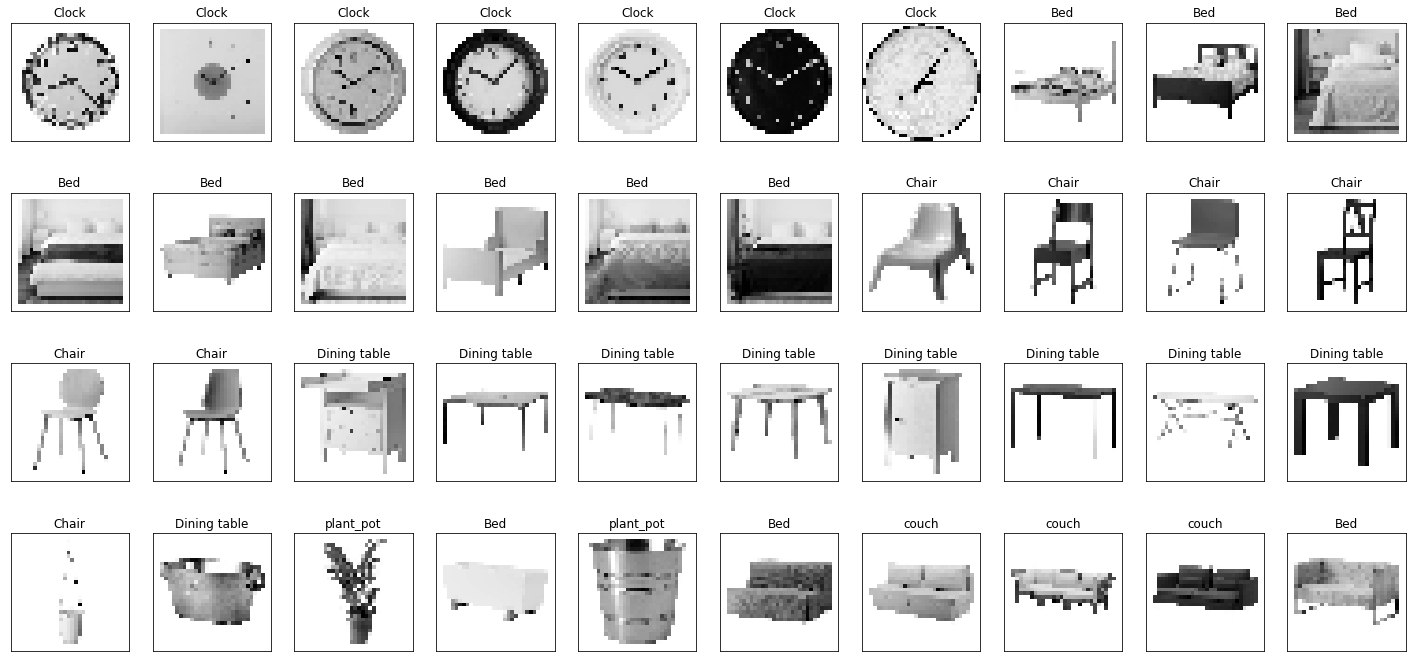

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from tensorflow import keras

DATADIR = "Desktop/ai_datasets/ikea-master /images"
TEST_DATADIR="Desktop/ai_datasets/ikea-master /testt"
CATEGORIES = ["Clock", "Bed","Chair","Dining table","Plant_pot","Couch"]
CATEGORIES_T = ["Clock", "Bed","Chair","Dining table","Plant_pot","Couch"]
IMG_SIZE =32

training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e: 
                pass

create_training_data()
X = []
Y = []
for features,label in training_data:
    X.append(features)
    Y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y=np.array(Y)
X = X/255.0

model=keras.Sequential([keras.layers.Flatten(input_shape=X.shape[1:]),
                       keras.layers.Dense(64,activation=tf.nn.relu),
                       keras.layers.Dense(7,activation=tf.nn.softmax)
                       ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X,Y,epochs=1200)


MODEL_NAME='furniture.model'
model.save(MODEL_NAME)

testing_data=[]
def create_test_data():
    for category in CATEGORIES_T: 

        path = os.path.join(TEST_DATADIR,category)  
        class_num = CATEGORIES_T.index(category)  
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                testing_data.append([new_array, class_num])  
            except Exception as e: 
                pass
create_test_data()

Xt = []
Yt = []
for features,label in testing_data:
    Xt.append(features)
    Yt.append(label)

print(Xt[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

Xt = np.array(Xt).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Yt=np.array(Yt)
Xt = Xt/255.0

test_loss,test_acc=model.evaluate(Xt,Yt)
print("test accuracy:", test_acc)
predictions=model.predict(Xt)


fig=plt.figure(figsize=(25, 12))
for num,data in enumerate(testing_data[:40]):
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4,10,num+1)
    orig = img_data
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 0: 
        str_label='Clock'
    if np.argmax(model_out) == 1:  
        str_label='Bed'
    if np.argmax(model_out) == 2:  
        str_label='Chair'
    if np.argmax(model_out) == 3:  
        str_label='Dining table'
    if np.argmax(model_out) == 4 :  
        str_label='plant_pot'
    if np.argmax(model_out) == 5 :  
        str_label='couch'
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()